# Task 1

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn

In [4]:
df_housing = pd.read_csv("housing_features.csv")
df_gene = pd.read_csv("gene_features.csv")
df_sensor = pd.read_csv("sensor_features.csv")

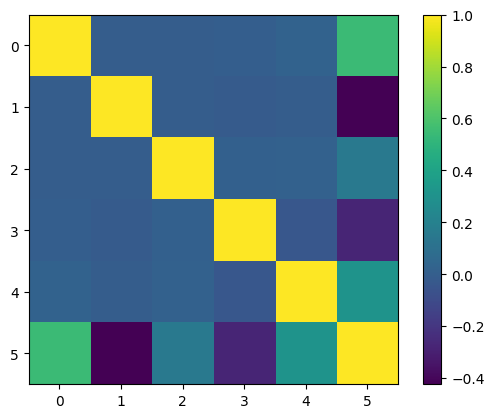

In [85]:
plt.imshow(df_housing.corr())
plt.colorbar()

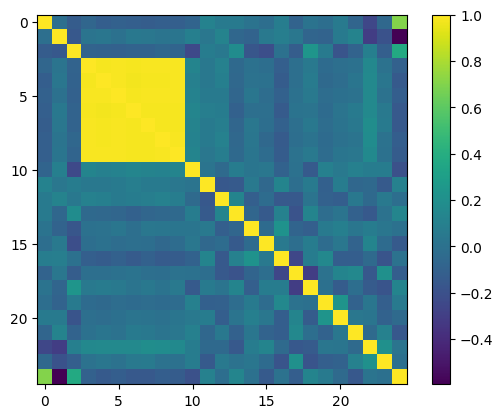

In [11]:
plt.imshow(df_gene.corr())
plt.colorbar()

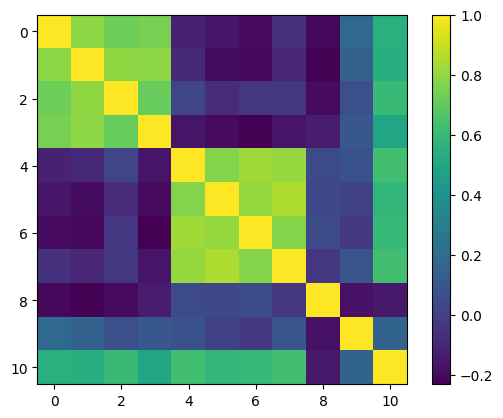

In [12]:
plt.imshow(df_sensor.corr())
plt.colorbar()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [30]:
def train_ols(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "target"]
    X = df[cols]
    y = df["target"]
    md = LinearRegression()
    md.fit(X, y)
    coefs = md.coef_
    coefs = np.concatenate([coefs, np.array([md.intercept_])], axis=0)
    return coefs.reshape((1, -1))

In [ ]:
def train_ridge(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "target"]
    X = df[cols]
    y = df["target"]
    lmbda = [0.003]
    const = []
    for i in range(10):
        lmbda.append(lmbda[i]*3)
    coefs = []
    for l in lmbda:
        md = Ridge(alpha= l)
        md.fit(X, y)
        coefs.append(md.coef_)
        const.append(md.intercept_)

    coefs = np.stack(coefs, axis=0)
    const = np.array(const).reshape((-1, 1))
    coefs = np.concatenate([coefs, const], axis=1)
    return coefs

def train_lasso(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "target"]
    X = df[cols]
    y = df["target"]
    lmbda = [0.003]
    const=[]
    for i in range(10):
        lmbda.append(lmbda[i]*3)
    coefs = []
    for l in lmbda:
        md = Lasso(alpha= l)
        md.fit(X, y)
        coefs.append(md.coef_)
        const.append(md.intercept_)

    coefs = np.stack(coefs, axis=0)
    const = np.array(const).reshape((-1, 1))
    coefs = np.concatenate([coefs, const], axis=1)
    return coefs


In [38]:
def mse(coefs, X, y):
   X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
   diff = ( y.reshape((1, -1)) - coefs @ X2.T )**2
   mse = np.mean(diff, axis=1)
   return mse.reshape((-1, 1))

def r2(coefs, X, y):
   X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
   diff = ((y.reshape((1, -1)))-coefs@X2.T )**2
   ssq = np.sum(diff, axis=1).reshape((-1, 1))
   ym = np.mean(y)
   vary = np.sum((y-ym)**2)
   toret = (1-ssq/vary).reshape((-1, 1))
   return toret




In [64]:
import math
n = len(df_housing)
ratio = 0.8
shuffled_inds = np.random.permutation(n)
train = df_housing.iloc[shuffled_inds[:math.floor(n*ratio)]]
test = df_housing.iloc[shuffled_inds[math.floor(n*ratio):]]

In [65]:
cf = train_ols(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

cf = train_lasso(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

cf = train_ridge(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

[[244.244]]
[[ 244.251]
 [ 244.266]
 [ 244.314]
 [ 244.472]
 [ 245.089]
 [ 248.228]
 [ 269.221]
 [ 436.396]
 [1135.666]
 [1145.839]
 [1145.839]]
[[244.244]
 [244.244]
 [244.244]
 [244.245]
 [244.246]
 [244.251]
 [244.266]
 [244.311]
 [244.458]
 [244.995]
 [247.393]]


In [66]:
np.set_printoptions(
    precision=3,      # decimal places
    suppress=True,    # no scientific notation for small numbers
    linewidth=120     # avoid ugly line breaks
)
cf = train_lasso(train)
display(cf)

array([[ 19.955, -14.882,   2.05 ,  -9.78 ,   9.919,   0.316],
       [ 19.949, -14.876,   2.05 ,  -9.774,   9.913,   0.316],
       [ 19.931, -14.859,   2.048,  -9.757,   9.895,   0.315],
       [ 19.877, -14.805,   2.042,  -9.704,   9.843,   0.315],
       [ 19.717, -14.645,   2.024,  -9.546,   9.685,   0.314],
       [ 19.236, -14.166,   1.97 ,  -9.072,   9.213,   0.311],
       [ 17.793, -12.726,   1.808,  -7.65 ,   7.797,   0.302],
       [ 13.464,  -8.408,   1.322,  -3.385,   3.547,   0.274],
       [  0.249,  -0.   ,   0.   ,  -0.   ,   0.   ,   0.431],
       [  0.   ,  -0.   ,   0.   ,  -0.   ,   0.   ,   0.433],
       [  0.   ,  -0.   ,   0.   ,  -0.   ,   0.   ,   0.433]])

In [67]:
train["target"].mean()

np.float64(0.43304192980093026)

In [68]:
cf = train_ols(df_housing)
display(cf)

array([[ 19.973, -14.98 ,   1.929,  -9.912,  10.055,   0.365]])

In [69]:
df_housing.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005602,-0.009874,0.031659,0.016515,-0.018352,0.337150
std,0.996480,1.010437,2.996310,1.003337,0.983375,33.115441
min,-3.241267,-3.922400,-10.126737,-3.856375,-3.655087,-113.212027
25%,-0.657905,-0.686583,-1.982659,-0.664681,-0.701760,-22.219270
50%,0.013466,-0.017451,0.029752,0.019259,-0.008017,0.486518
75%,0.666011,0.677238,2.026603,0.706615,0.650606,22.618677
max,3.926238,3.529055,10.286731,4.479084,3.611350,124.641106


In [70]:
noise  = 15* np.random.randn(len(df_housing))
df_test = df_housing
df_test["target"]= df_test["target"]+ noise
df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.496714,-0.423760,-2.035484,-0.143423,0.348286,49.400021
1,-0.138264,-0.453414,-0.916498,-0.032656,0.283324,-8.450417
2,0.647689,-1.795643,-1.792143,0.064295,-0.936520,9.701207
3,1.523030,-0.330090,0.331254,0.946861,0.579584,58.307220
4,-0.234153,0.732829,3.591536,-0.747217,-1.490083,-16.440297
...,...,...,...,...,...,...
4995,-0.048965,1.301102,-2.728956,0.387827,-0.605668,-58.111333
4996,0.711411,-1.998345,3.711453,1.377367,-0.287484,22.076471
4997,3.112910,-0.705317,3.936624,0.378354,0.967779,78.918086
4998,0.808036,0.495766,-2.652327,1.713530,0.623693,1.946526


In [83]:
n = len(df_test)
ratio = 0.01
shuffled_inds = np.random.permutation(n)
train = df_test.iloc[shuffled_inds[:25]]
test = df_test.iloc[shuffled_inds[25:]]

In [84]:
cf = train_ols(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

cf = train_lasso(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

cf = train_ridge(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

[[673.873]]
[[ 673.604]
 [ 673.067]
 [ 671.454]
 [ 666.7  ]
 [ 652.86 ]
 [ 649.297]
 [ 647.636]
 [ 682.008]
 [ 882.073]
 [1389.189]
 [1389.189]]
[[ 673.844]
 [ 673.785]
 [ 673.611]
 [ 673.095]
 [ 671.61 ]
 [ 667.676]
 [ 659.783]
 [ 658.301]
 [ 724.765]
 [ 942.27 ]
 [1189.431]]


In [109]:
import math
n = len(df_gene)
ratio = 0.8
shuffled_inds = np.random.permutation(n)
train = df_gene.iloc[shuffled_inds[:math.floor(n*ratio)]]
test =  df_gene.iloc[shuffled_inds[math.floor(n*ratio):]]


cf = train_ols(train)
print(cf)


[[ 20.076 -14.548   9.31   -0.715   2.326   1.802  -2.517   0.896  -3.216   1.271  -0.177   0.545   0.332  -0.14
    0.172  -0.224  -0.768   0.538  -0.193   0.59    0.151   0.027   1.127  -0.834  -0.703]]


In [111]:
cf = train_ridge(train)
print(cf)

[[ 20.074 -14.547   9.309  -0.711   2.321   1.8    -2.515   0.893  -3.209   1.268  -0.177   0.545   0.331  -0.14
    0.172  -0.224  -0.768   0.537  -0.192   0.59    0.151   0.028   1.126  -0.833  -0.703]
 [ 20.07  -14.546   9.307  -0.703   2.311   1.796  -2.511   0.888  -3.196   1.262  -0.179   0.545   0.33   -0.139
    0.172  -0.223  -0.769   0.536  -0.19    0.59    0.151   0.028   1.124  -0.833  -0.703]
 [ 20.06  -14.542   9.302  -0.679   2.28    1.783  -2.499   0.873  -3.157   1.244  -0.182   0.545   0.326  -0.139
    0.171  -0.221  -0.77    0.532  -0.186   0.591   0.151   0.029   1.119  -0.83   -0.703]
 [ 20.028 -14.53    9.286  -0.612   2.191   1.746  -2.463   0.828  -3.046   1.192  -0.194   0.544   0.315  -0.136
    0.169  -0.216  -0.773   0.521  -0.174   0.594   0.152   0.031   1.104  -0.824  -0.703]
 [ 19.938 -14.491   9.24   -0.437   1.952   1.649  -2.364   0.71   -2.755   1.063  -0.226   0.543   0.286  -0.129
    0.163  -0.202  -0.782   0.49   -0.14    0.603   0.153   0.036  

In [100]:
cf = train_lasso(train)
ind = np.argmin(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))
cols = df_gene.columns[ np.where(np.abs(cf[ind]) > 0.01)]
cols
    

/home/aditya/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.528e+00, tolerance: 4.088e+00
  model = cd_fast.enet_coordinate_descent(


Index(['gene_1', 'gene_2', 'gene_3', 'gene_16', 'target'], dtype='object')

In [106]:
df_new = df_gene[cols]

n = len(df_gene)
ratio = 0.8
shuffled_inds = np.random.permutation(n)
train = df_new.iloc[shuffled_inds[:math.floor(n*ratio)]]
test =  df_new.iloc[shuffled_inds[math.floor(n*ratio):]]

cf = train_ols(df_new)
print(r2(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

[[0.98]]


In [113]:
n = len(df_sensor)
ratio = 0.8
shuffled_inds = np.random.permutation(n)
train = df_sensor.iloc[shuffled_inds[:math.floor(n*ratio)]]
test =  df_sensor.iloc[shuffled_inds[math.floor(n*ratio):]]

In [117]:
cf = train_ols(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

cf = train_lasso(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

cf = train_ridge(train)
print(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))

[[18.478]]
[[ 18.479]
 [ 18.476]
 [ 18.473]
 [ 18.481]
 [ 18.175]
 [ 18.564]
 [ 27.938]
 [ 96.587]
 [133.656]
 [133.656]
 [133.656]]
[[18.476]
 [18.472]
 [18.462]
 [18.43 ]
 [18.338]
 [18.078]
 [17.425]
 [16.158]
 [14.636]
 [15.338]
 [28.161]]


In [116]:
cf = train_lasso(train)
print(cf)

cf = train_ridge(train)
print(cf)

[[ 3.072  2.963  1.007  2.735  1.551  2.857  3.877  1.022 -0.466  0.052 -0.86 ]
 [ 3.075  2.959  1.007  2.729  1.549  2.856  3.873  1.021 -0.46   0.048 -0.862]
 [ 3.083  2.946  1.007  2.709  1.543  2.852  3.863  1.02  -0.444  0.036 -0.867]
 [ 3.107  2.907  1.005  2.651  1.527  2.841  3.833  1.016 -0.395  0.002 -0.881]
 [ 3.149  2.77   1.047  2.479  1.455  2.798  3.756  1.011 -0.228  0.    -0.919]
 [ 3.246  2.339  1.112  2.026  1.325  2.68   3.533  0.893 -0.     0.    -0.988]
 [ 3.479  1.003  1.149  0.826  1.151  2.346  2.886  0.29  -0.     0.    -1.087]
 [ 1.314  0.     0.     0.     0.271  0.373  1.324  0.    -0.     0.    -1.236]
 [ 0.     0.     0.     0.     0.     0.     0.     0.    -0.     0.    -1.063]
 [ 0.     0.     0.     0.     0.     0.     0.     0.    -0.     0.    -1.063]
 [ 0.     0.     0.     0.     0.     0.     0.     0.    -0.     0.    -1.063]]
[[ 3.07   2.966  1.008  2.738  1.55   2.856  3.879  1.024 -0.468  0.054 -0.86 ]
 [ 3.07   2.965  1.009  2.738  1.55   2

In [128]:
# function for a new df with the relevant features
def noise_removal_func(df):
    n = len(df)
    ratio = 0.8
    shuffled_inds = np.random.permutation(n)
    train = df.iloc[shuffled_inds[:math.floor(n*ratio)]]
    test =  df.iloc[shuffled_inds[math.floor(n*ratio):]]
    cf = train_lasso(df)
    ind = np.argmin(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))
    msk = np.where(np.abs(cf[ind, :-1]) > 0.05)
    df_new = df[df.columns[msk]]
    df_new["target"] = df["target"]
    return df_new



In [129]:
df_new = noise_removal_func(df_sensor)

In [130]:
df_new

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,target
0,0.675608,0.082217,-0.300500,0.959803,-1.036876,-1.676732,-0.946229,-1.231034,1.399355,0.998010,-9.061341
1,0.142128,-0.418355,-0.437952,0.816444,-0.881728,0.103859,-0.678668,-0.617315,0.924634,-2.896255,-6.018502
2,1.189214,1.021335,0.650310,-0.051595,0.092088,-0.694886,-0.294654,-0.328342,0.059630,2.088375,3.172038
3,2.049931,1.828215,1.546520,1.804514,-0.124458,-1.506508,-1.033415,-0.163051,-0.646937,-0.139590,7.750824
4,-0.922988,-0.244604,-0.459186,-0.559475,0.045432,-0.939600,-0.378534,-0.065736,0.698223,1.108183,-3.905531
...,...,...,...,...,...,...,...,...,...,...,...
95,-1.809970,-1.698103,-1.194060,-1.718523,0.230544,0.911894,0.709672,0.244767,-0.080717,0.440475,-10.880865
96,0.745920,-0.560447,-0.222503,0.161183,-0.720791,-0.903635,-0.967416,0.014986,0.078635,-0.019638,-4.958295
97,0.414705,0.937991,0.165886,-0.228327,-0.471832,0.494475,0.227082,0.474147,-1.998201,0.552490,3.857529
98,0.411545,-0.052156,-0.432696,-0.217033,0.520222,0.072368,0.661463,-0.227381,0.916328,0.223914,0.900614


In [131]:
def fitter(df):
    n = len(df)
    ratio = 0.8
    shuffled_inds = np.random.permutation(n)
    train = df.iloc[shuffled_inds[:math.floor(n*ratio)]]
    test =  df.iloc[shuffled_inds[math.floor(n*ratio):]]
    cf = train_ridge(df)
    ans = np.min(mse(cf, test[list(test.columns)[:-1]].to_numpy(), test["target"].to_numpy()))
    return ans


In [132]:
def fullpipe(df):
    return fitter(noise_removal_func(df))

In [133]:
fullpipe(df_sensor)

np.float64(7.707260535014624)

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

class fitter(TransformerMixin, BaseEstimator):
    def __init__(self):
        super().__init__()
    def fit():
        

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

noise_removal = FunctionTransformer(noise_removal_func)

pipe = Pipeline([
    ('noise_removal', noise_removal),
    ()
])